In [1]:
imagePath = "T_Sheep_BaseColor.tga"

In [203]:
from perlin_numpy import generate_fractal_noise_2d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = Image.open(imagePath)

In [150]:
def color(h,s,v):
    return np.array([h * (255 / 360), s * (255 / 100), v * (255 / 100)], dtype="uint8")

baseColor = color(30, 86, 40)

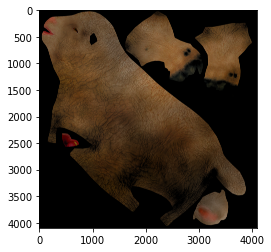

In [228]:
alpha = np.asarray(image)[:,:,3]
hsv = np.asarray(image.convert("HSV"), dtype="int32")

hue = hsv[:,:,0]
saturation = hsv[:,:,1]
value = hsv[:,:,2]

furCondition = np.logical_and.reduce([alpha > 0, saturation < 128, value > 96])

meanHue = hue.mean(where=furCondition)
meanSaturation = saturation.mean(where=furCondition)
meanValue = value.mean(where=furCondition)

valueMask = 1 - np.abs(value - meanValue) / meanValue

inputColor = np.array([meanHue, meanSaturation, meanValue])

hueShift = int(baseColor[0] - inputColor[0])
saturationShift = np.array(valueMask * (baseColor[1] - inputColor[1]), dtype="int32")
valueShift = int(baseColor[2] - inputColor[2])

hsv[:,:,0] += hueShift
hsv[:,:,1] += saturationShift
hsv[:,:,2] += valueShift

saturationNoise = np.array(60 * (generate_fractal_noise_2d((4096, 4096), (2,2), 8) - 0.7), dtype="int32")
valueNoise = np.array(60 * (generate_fractal_noise_2d((4096, 4096), (2,2), 8) - 0.3), dtype="int32")

hsv[:,:,1] += saturationNoise
hsv[:,:,2] += valueNoise

hsv = np.array(hsv.clip(0,255), dtype="uint8")

red = np.array([0,255,255])

output = Image.fromarray(hsv, "HSV").convert("RGB")
a = Image.fromarray(alpha, "L")
#output.putalpha(a)

plt.imshow(output)

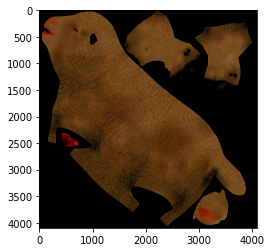

In [204]:
plt.imshow(output)

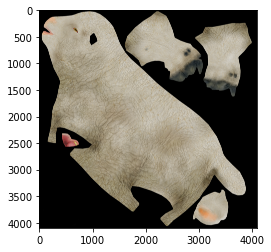

In [174]:
plt.imshow(image.convert("RGB"))

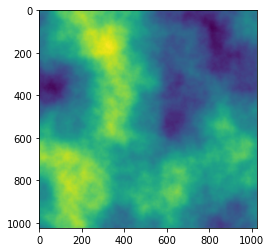

In [225]:
plt.imshow(generate_fractal_noise_2d((1024, 1024), (2,2), 8))